In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import Birch
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [ ]:
# read data from csv
clean_ling_data = pd.read_csv('/Users/lizixin/stat-215-a/lab2/data/ling_data.csv')
clean_lingloc = pd.read_csv('/Users/lizixin/stat-215-a/lab2/data/clean_lingloc.csv')
pcadata = pd.read_csv('/Users/lizixin/stat-215-a/lab2/data/pcadata.csv')

In [ ]:
X = pcadata.iloc[:, :47]

In [ ]:
# define the model
model = Birch(threshold=0.01, n_clusters=6)

In [ ]:
# fit the model
model.fit(X)

Birch(n_clusters=6, threshold=0.01)

In [ ]:
labels = model.labels_

In [ ]:
# Post-process the cluster labels
clustered_data = pd.DataFrame(X, columns=X.columns)
clustered_data['Cluster'] = labels + 1  # Offset cluster labels to start from 1
clustered_data['Latitude'] = clean_ling_data['lat']
clustered_data['Longitude'] = clean_ling_data['long']
print(clustered_data.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.173995 -0.333868 -0.320387 -0.252342 -0.074761  0.666812  0.204604   
1  0.219752  0.004932  0.286128 -0.057200 -0.363277 -0.764178  0.358190   
2 -0.031835  0.055150  0.316119  0.067760 -0.984960 -0.371432  0.310982   
3 -0.284307 -0.200557  0.572837  0.021885 -0.425297 -0.467187 -0.193866   
4 -0.266415  0.404742  0.416016  0.149584 -0.212001 -0.405799 -0.048427   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.029095 -0.150490  0.039195 -0.027193  0.384249  0.137345  0.789059   
1  0.686461 -0.530625 -0.567179  0.578088  0.567565  0.109550 -0.149270   
2  0.244445 -0.687474 -0.755733  0.132186  0.157788 -0.095393  0.105432   
3 -0.181947 -0.390715 -0.030846  0.823614  0.133196  0.408944  0.243363   
4  0.144182 -0.362279 -0.255297 -0.053754  0.631308 -0.080691  0.147754   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.067082  0.558156 -

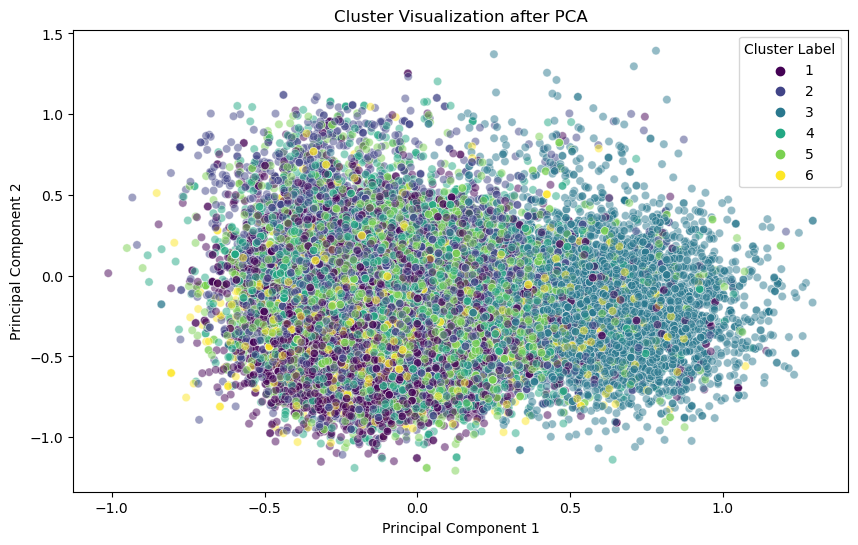

In [ ]:
# Create a scatter plot of the PCA result, coloring by cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data = clustered_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.5)
plt.title('Cluster Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Label')
plt.show()

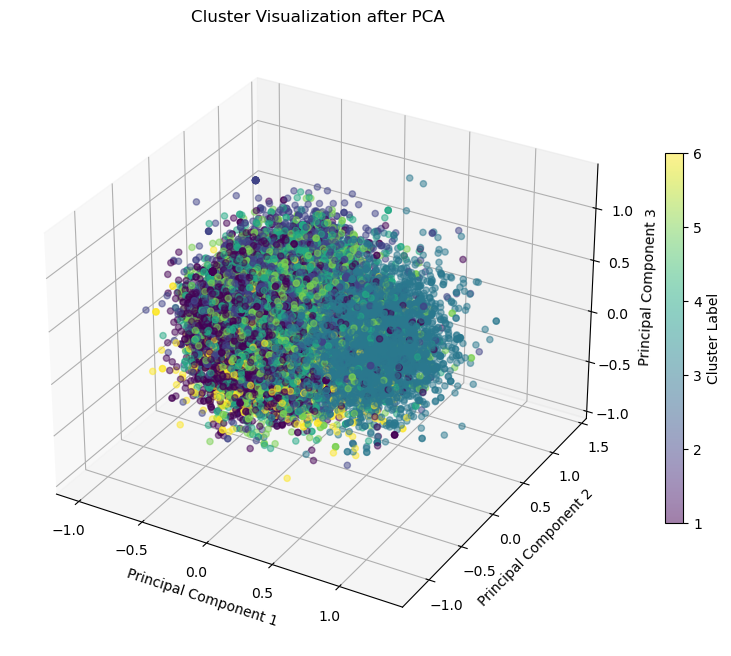

In [ ]:
# Assuming clustered_elbow_data is your DataFrame with PCA results and cluster labels
# Make sure your DataFrame has 'PC1', 'PC2', 'PC3', and 'Cluster' columns

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(clustered_data['PC1'], clustered_data['PC2'], clustered_data['PC3'],
                     c=clustered_data['Cluster'], cmap='viridis', alpha=0.5, marker='o')

# Set the titles and labels
ax.set_title('Cluster Visualization after PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Cluster Label')

# Show the plot
plt.show()

In [ ]:
fig = px.scatter_mapbox(clustered_data, lat='Latitude', lon='Longitude', color='Cluster', color_discrete_map='viridis',
                            mapbox_style="open-street-map",
                            title="Survey Responses on a Map in North America",
                            center={"lat": 45, "lon": -100}, # Set the map center to the general area of North America
                            zoom=3)  # Set the initial zoom level

fig.show()